In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

crimes = pd.read_csv('Crimes_-_2001_to_present.csv')
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)


# Exploratory Analysis

In [2]:
crimes.iloc[:5]

ID Case Number                    Date                Block  IUCR  \
0  1575982     G340379  06/10/2001 12:00:00 PM   002XX N KILDARE AV  1310   
1  1575983     G311925  05/30/2001 11:13:07 AM        005XX E 36 ST  2024   
2  1575984     G322469  06/04/2001 10:23:46 AM     0000X N HOYNE AV  1811   
3  1575985     G331526  06/08/2001 11:30:00 AM  054XX S ABERDEEN ST  3960   
4  1575986     G336493  06/10/2001 05:15:00 PM  008XX N LAVERGNE AV  2024   

      Primary Type                   Description  \
0  CRIMINAL DAMAGE                   TO PROPERTY   
1        NARCOTICS           POSS: HEROIN(WHITE)   
2        NARCOTICS  POSS: CANNABIS 30GMS OR LESS   
3     INTIMIDATION                  INTIMIDATION   
4        NARCOTICS           POSS: HEROIN(WHITE)   

             Location Description  Arrest  Domestic  \
0                       RESIDENCE   False     False   
1  CHA HALLWAY/STAIRWELL/ELEVATOR    True     False   
2                          STREET    True     False   
3                       RESIDENCE   False     False   
4                        SIDEWALK    True     False   

               ...                Ward  Community Area  FBI Code  \
0              ...                 NaN             NaN        14   
1              ...                 NaN             NaN        18   
2              ...                 NaN             NaN        18   
3              ...                 NaN             NaN        26   
4              ...                 NaN             NaN        18   

   X Coordinate Y Coordinate  Year              Updated On   Latitude  \
0     1147734.0    1900728.0  2001  08/17/2015 03:03:40 PM  41.883552   
1     1180765.0    1881037.0  2001  08/17/2015 03:03:40 PM  41.828820   
2     1162359.0    1900563.0  2001  08/17/2015 03:03:40 PM  41.882805   
3     1169863.0    1868860.0  2001  08/17/2015 03:03:40 PM  41.795649   
4     1142830.0    1905076.0  2001  08/17/2015 03:03:40 PM  41.895576   

   Longitude                       Location  
0 -87.732970  (41.883551583, -87.732969704)  
1 -87.612285  (41.828820156, -87.612285393)  
2 -87.679270  (41.882805493, -87.679270054)  
3 -87.652638  (41.795649328, -87.652637815)  
4 -87.750869  (41.895575744, -87.750869411)  

[5 rows x 22 columns]

In [3]:
crime_counts = crimes['Primary Type'].value_counts()
crime_counts

THEFT                                1441480
BATTERY                              1250343
CRIMINAL DAMAGE                       781040
NARCOTICS                             716707
ASSAULT                               426017
OTHER OFFENSE                         425414
BURGLARY                              391845
MOTOR VEHICLE THEFT                   317906
DECEPTIVE PRACTICE                    270487
ROBBERY                               258768
CRIMINAL TRESPASS                     195960
WEAPONS VIOLATION                      72831
PROSTITUTION                           68577
PUBLIC PEACE VIOLATION                 48355
OFFENSE INVOLVING CHILDREN             46334
CRIM SEXUAL ASSAULT                    27878
SEX OFFENSE                            25625
INTERFERENCE WITH PUBLIC OFFICER       15634
GAMBLING                               14438
LIQUOR LAW VIOLATION                   14135
ARSON                                  11287
HOMICIDE                                9611
KIDNAPPING

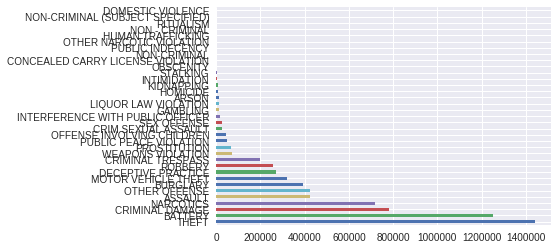

In [4]:
%matplotlib inline
crime_counts.plot(kind='barh')

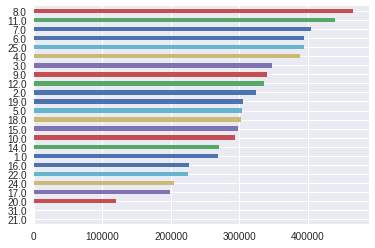

In [5]:
%matplotlib inline
crimes['District'].value_counts(ascending=True).plot(kind='barh')

In [6]:
crimes['Location Description'].value_counts()

STREET                            1791764
RESIDENCE                         1159744
APARTMENT                          711493
SIDEWALK                           672035
OTHER                              260596
PARKING LOT/GARAGE(NON.RESID.)     196529
ALLEY                              152501
SCHOOL, PUBLIC, BUILDING           143892
RESIDENCE-GARAGE                   132672
SMALL RETAIL STORE                 121956
RESIDENCE PORCH/HALLWAY            119773
VEHICLE NON-COMMERCIAL             110157
RESTAURANT                         108435
GROCERY FOOD STORE                  88655
DEPARTMENT STORE                    85471
GAS STATION                         73394
RESIDENTIAL YARD (FRONT/BACK)       70883
CHA PARKING LOT/GROUNDS             55619
PARK PROPERTY                       52588
COMMERCIAL / BUSINESS OFFICE        49815
BAR OR TAVERN                       36928
CTA PLATFORM                        36724
CHA APARTMENT                       36255
DRUG STORE                        

<IPython.core.display.Javascript object>


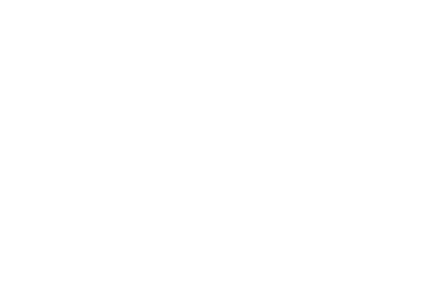

<IPython.core.display.Javascript object>


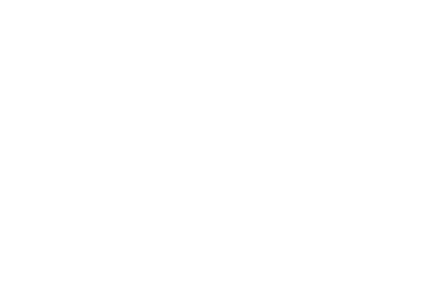

In [8]:
%matplotlib notebook

crimes.resample('M').size().plot(legend=True)
plt.title('# of crimes per month')
plt.xlabel('M')
plt.ylabel('# of crimes')
plt.show()

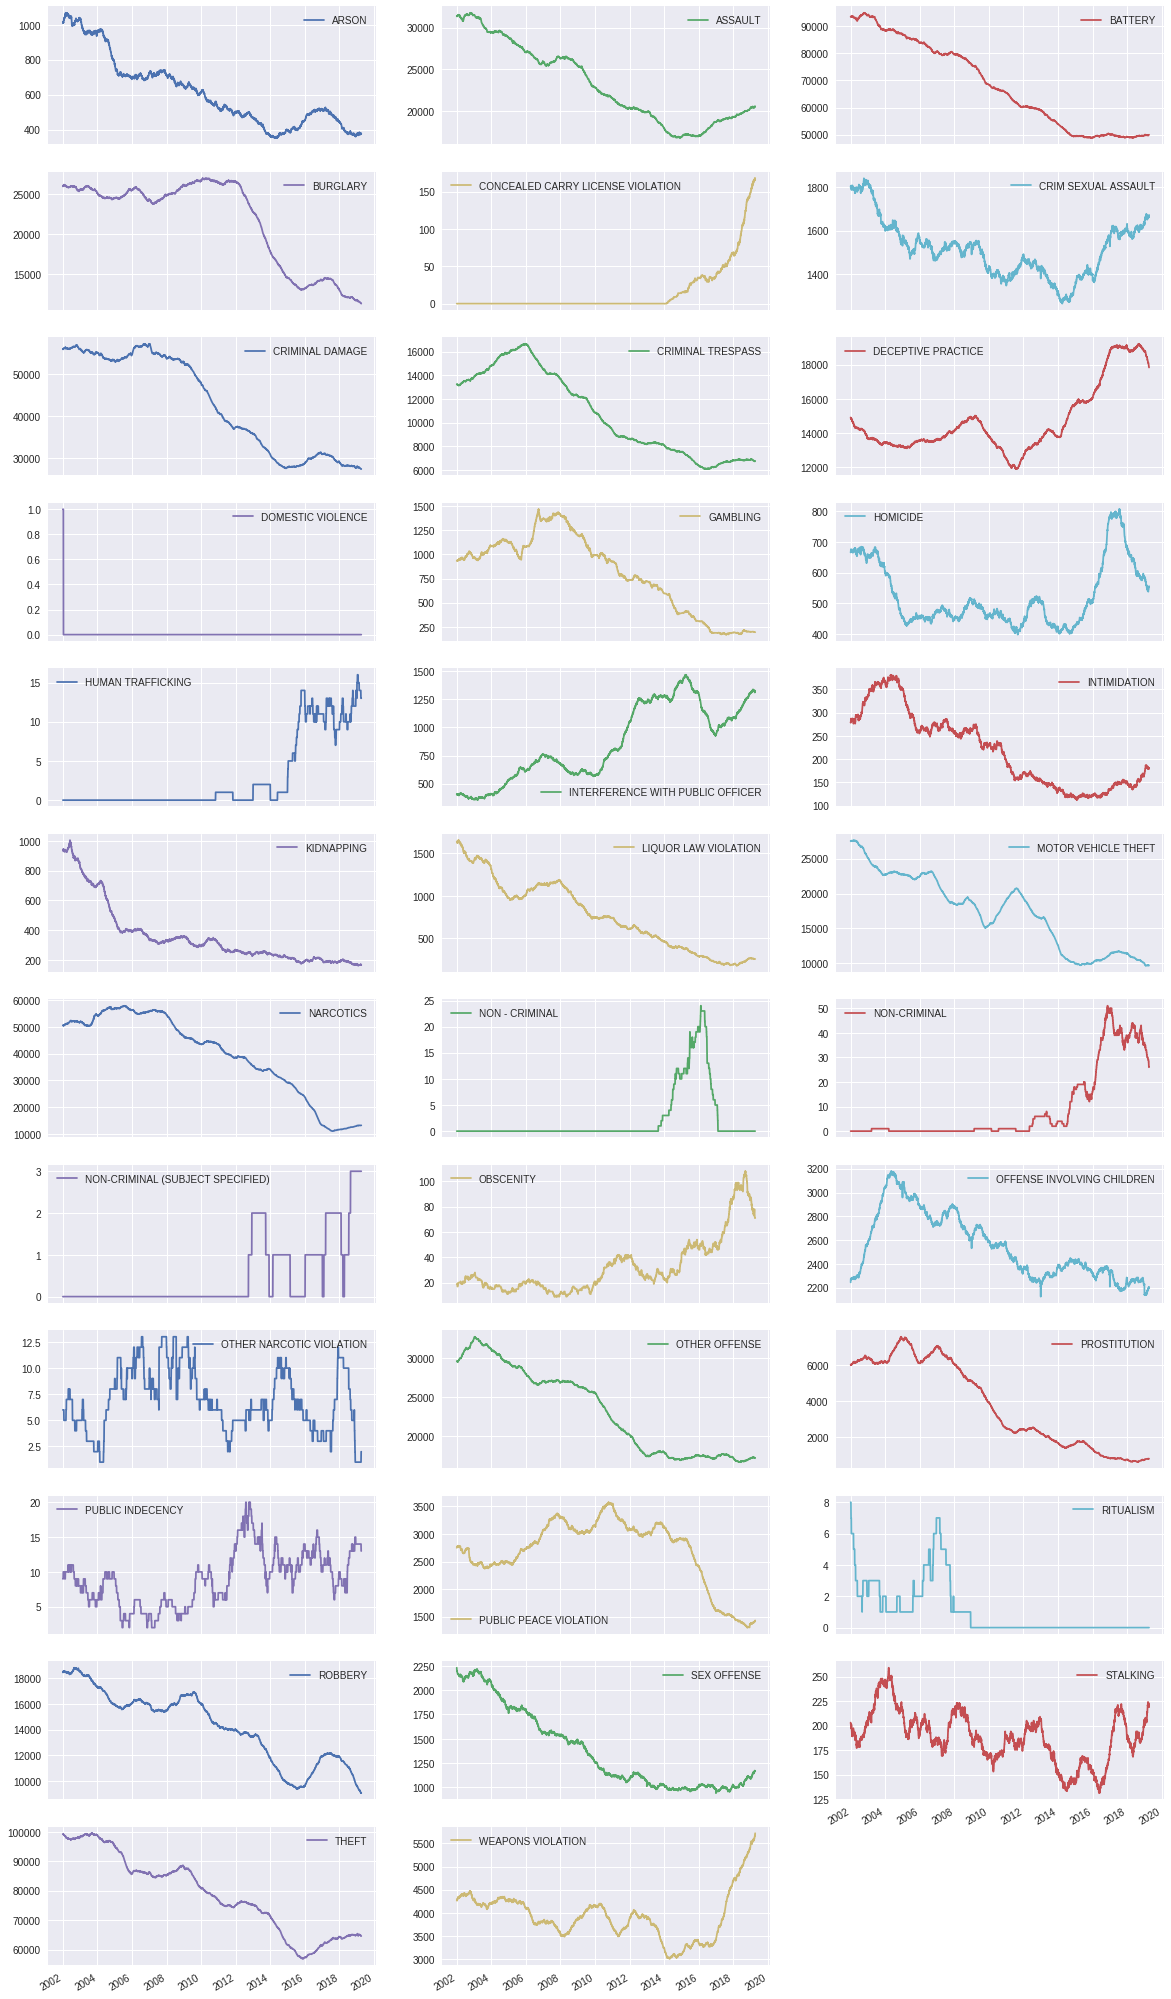

In [9]:
%matplotlib inline

crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date).fillna(0)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 40), subplots=True, layout=(-1, 3))


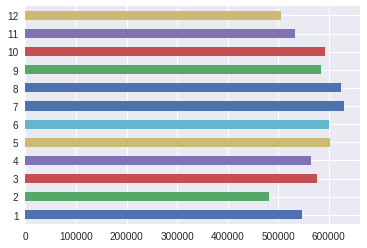

In [10]:
crimes['Date'].apply(lambda x: x.month).value_counts(sort=False).plot(kind='barh')

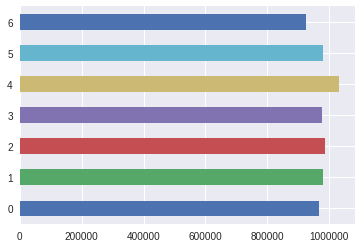

In [11]:
crimes['Date'].apply(lambda x: x.weekday()).value_counts(sort=False).plot(kind='barh')

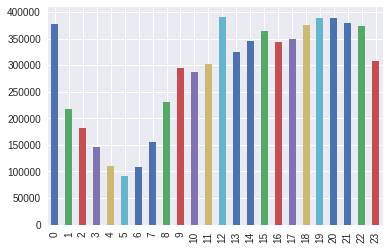

In [12]:
crimes['Date'].apply(lambda x: x.hour).value_counts(sort=False).plot(kind='bar')

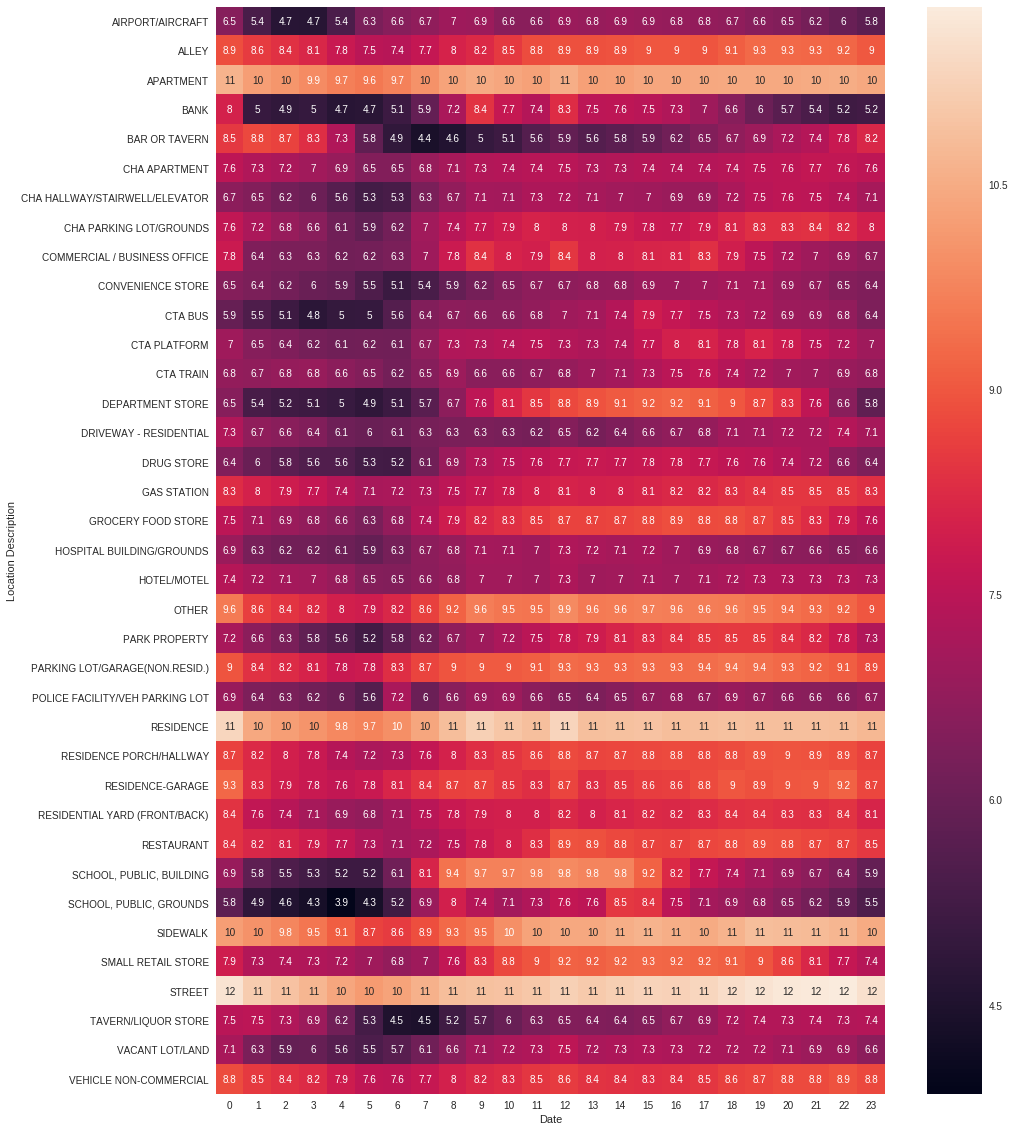

In [13]:
%matplotlib inline

pivot = crimes.pivot_table(values='ID', index='Location Description', 
                               columns=crimes.index.hour, aggfunc=(lambda x: np.log(np.size(x)))).fillna(0)
pivot = pivot[pivot.sum(axis=1) > 150]

fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(pivot, ax=ax, annot=True)



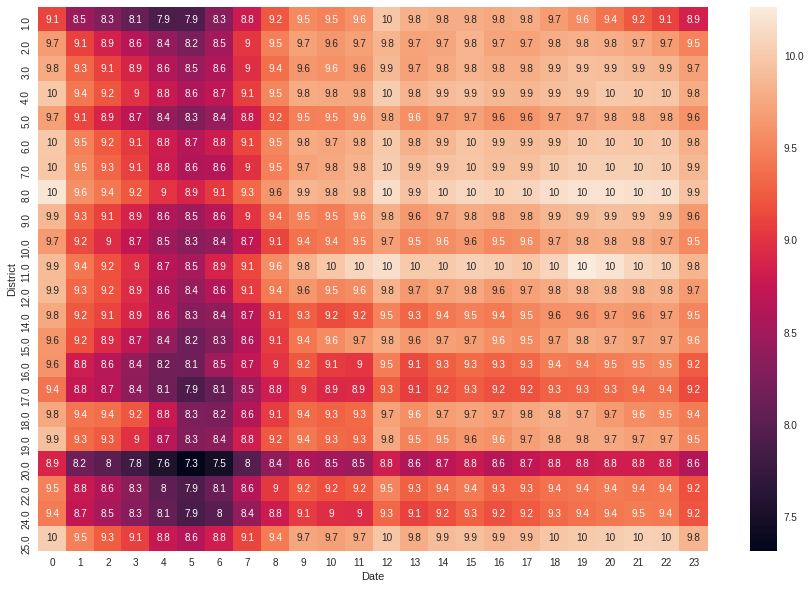

In [14]:

pivot = crimes.pivot_table(values='ID', index='District', 
                               columns=crimes.index.hour, aggfunc=(lambda x: np.log(np.size(x)))).fillna(0)
pivot = pivot[pivot.sum(axis=1) > 150]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot, ax=ax, annot=True)


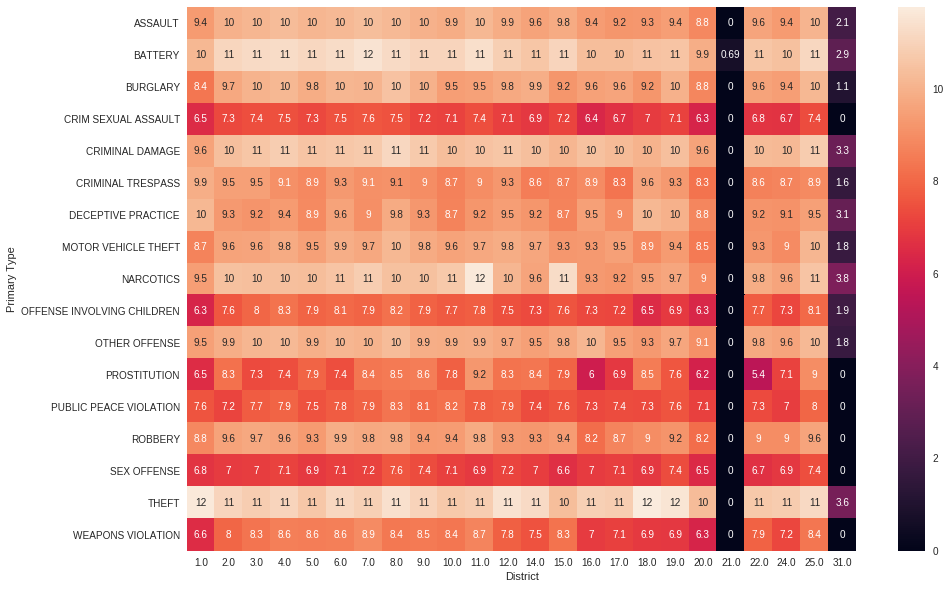

In [15]:

pivot = crimes.pivot_table(values='ID', index='Primary Type', 
                               columns='District', aggfunc=(lambda x: np.log(np.size(x)))).fillna(0)
pivot = pivot[pivot.sum(axis=1) > 150]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot, ax=ax, annot=True)


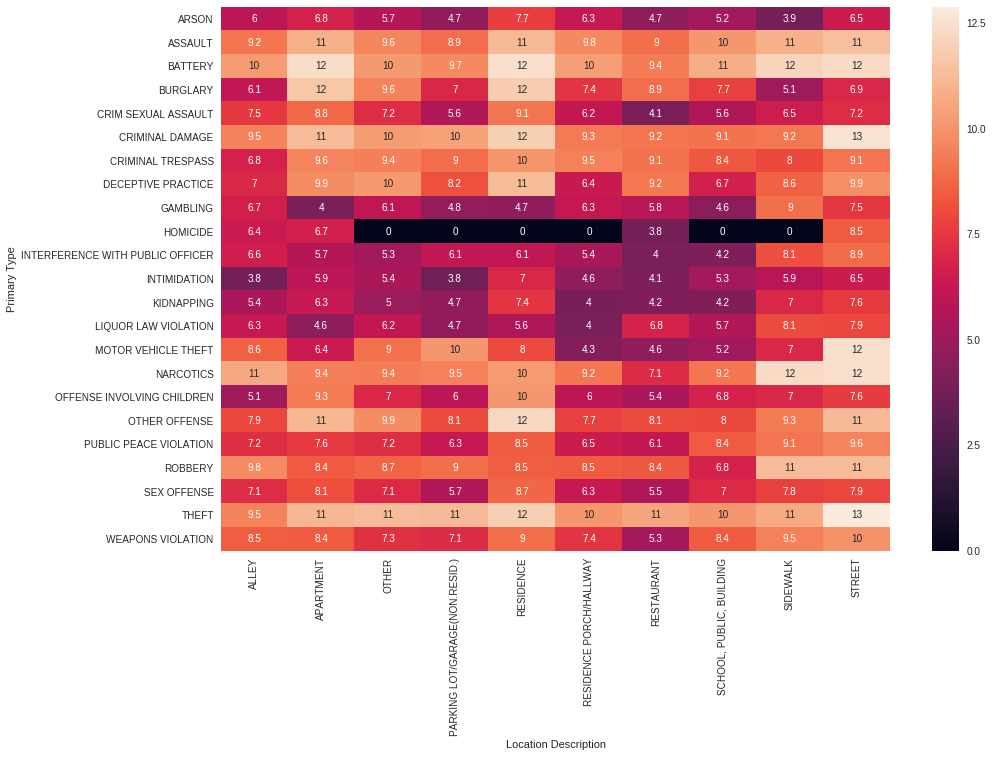

In [16]:

pivot = crimes.pivot_table(values='ID', index='Primary Type', 
                               columns='Location Description', aggfunc=(lambda x: np.log(np.size(x)))).fillna(0)
pivot = pivot[pivot.sum(axis=1) > 150]
pivot = pivot.T
pivot = pivot[pivot.sum(axis=1) > 150]


fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot.T, ax=ax, annot=True)


# Feature Engineering

In [5]:
data = crimes
data['weekday'] = crimes['Date'].dt.weekday
data['hour'] = crimes['Date'].dt.hour
data['month'] = crimes['Date'].dt.month
data.head()

ID Case Number                Date  \
Date                                                           
2001-06-10 12:00:00  1575982     G340379 2001-06-10 12:00:00   
2001-05-30 11:13:07  1575983     G311925 2001-05-30 11:13:07   
2001-06-04 10:23:46  1575984     G322469 2001-06-04 10:23:46   
2001-06-08 11:30:00  1575985     G331526 2001-06-08 11:30:00   
2001-06-10 17:15:00  1575986     G336493 2001-06-10 17:15:00   

                                   Block  IUCR     Primary Type  \
Date                                                              
2001-06-10 12:00:00   002XX N KILDARE AV  1310  CRIMINAL DAMAGE   
2001-05-30 11:13:07        005XX E 36 ST  2024        NARCOTICS   
2001-06-04 10:23:46     0000X N HOYNE AV  1811        NARCOTICS   
2001-06-08 11:30:00  054XX S ABERDEEN ST  3960     INTIMIDATION   
2001-06-10 17:15:00  008XX N LAVERGNE AV  2024        NARCOTICS   

                                      Description  \
Date                                                
2001-06-10 12:00:00                   TO PROPERTY   
2001-05-30 11:13:07           POSS: HEROIN(WHITE)   
2001-06-04 10:23:46  POSS: CANNABIS 30GMS OR LESS   
2001-06-08 11:30:00                  INTIMIDATION   
2001-06-10 17:15:00           POSS: HEROIN(WHITE)   

                               Location Description  Arrest  Domestic  ...    \
Date                                                                   ...     
2001-06-10 12:00:00                       RESIDENCE   False     False  ...     
2001-05-30 11:13:07  CHA HALLWAY/STAIRWELL/ELEVATOR    True     False  ...     
2001-06-04 10:23:46                          STREET    True     False  ...     
2001-06-08 11:30:00                       RESIDENCE   False     False  ...     
2001-06-10 17:15:00                        SIDEWALK    True     False  ...     

                     X Coordinate  Y Coordinate  Year              Updated On  \
Date                                                                            
2001-06-10 12:00:00     1147734.0     1900728.0  2001  08/17/2015 03:03:40 PM   
2001-05-30 11:13:07     1180765.0     1881037.0  2001  08/17/2015 03:03:40 PM   
2001-06-04 10:23:46     1162359.0     1900563.0  2001  08/17/2015 03:03:40 PM   
2001-06-08 11:30:00     1169863.0     1868860.0  2001  08/17/2015 03:03:40 PM   
2001-06-10 17:15:00     1142830.0     1905076.0  2001  08/17/2015 03:03:40 PM   

                      Latitude  Longitude                       Location  \
Date                                                                       
2001-06-10 12:00:00  41.883552 -87.732970  (41.883551583, -87.732969704)   
2001-05-30 11:13:07  41.828820 -87.612285  (41.828820156, -87.612285393)   
2001-06-04 10:23:46  41.882805 -87.679270  (41.882805493, -87.679270054)   
2001-06-08 11:30:00  41.795649 -87.652638  (41.795649328, -87.652637815)   
2001-06-10 17:15:00  41.895576 -87.750869  (41.895575744, -87.750869411)   

                     weekday hour  month  
Date                                      
2001-06-10 12:00:00        6   12      6  
2001-05-30 11:13:07        2   11      5  
2001-06-04 10:23:46        0   10      6  
2001-06-08 11:30:00        4   11      6  
2001-06-10 17:15:00        6   17      6  

[5 rows x 25 columns]

In [6]:
cols_drop = [ 'Case Number', 'ID', 'IUCR', 'Date', 'Block', 'Updated On',
            'Location', 'Longitude', 'Latitude', 'FBI Code']

transformed = data.drop(cols_drop, axis=1).dropna(0)
len(transformed), len(crimes), transformed.isnull().sum(axis=0)

(6172695, 6846406, Primary Type            0
 Description             0
 Location Description    0
 Arrest                  0
 Domestic                0
 Beat                    0
 District                0
 Ward                    0
 Community Area          0
 X Coordinate            0
 Y Coordinate            0
 Year                    0
 weekday                 0
 hour                    0
 month                   0
 dtype: int64)

In [7]:
ordinal_cols = ['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']

for col in ordinal_cols:
    c = pd.Categorical(transformed[col], 
                       categories=transformed[col].unique().tolist(), 
                       ordered=False)
    transformed[col + '_ord'] = transformed[col].astype(c).cat.codes

transformed = transformed.drop(ordinal_cols, axis=1)

In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
transformed['x'] = scaler.fit_transform(transformed['X Coordinate'].values.reshape(-1,1))
scaler = RobustScaler()
transformed['y'] = scaler.fit_transform(transformed['Y Coordinate'].values.reshape(-1,1))
transformed.drop(['X Coordinate', 'Y Coordinate'], axis=1, inplace=True)
transformed.head()

Beat  District  Ward  Community Area  Year  weekday  \
Date                                                                       
2001-06-09 18:00:00   835       8.0  18.0            66.0  2001        5   
2002-06-30 07:15:00   722       7.0  20.0            68.0  2002        6   
2002-06-24 06:00:00  1115      11.0  28.0            26.0  2002        0   
2001-06-02 07:00:00  1323      12.0  27.0            24.0  2001        5   
2002-06-15 21:00:00  2022      20.0  48.0            77.0  2002        5   

                     hour  month  Primary Type_ord  Description_ord  \
Date                                                                  
2001-06-09 18:00:00    18      6                 0                0   
2002-06-30 07:15:00     7      6                 1                1   
2002-06-24 06:00:00     6      6                 1                1   
2001-06-02 07:00:00     7      6                 2                2   
2002-06-15 21:00:00    21      6                 1                1   

                     Location Description_ord  Arrest_ord  Domestic_ord  \
Date                                                                      
2001-06-09 18:00:00                         0           0             0   
2002-06-30 07:15:00                         1           1             0   
2002-06-24 06:00:00                         2           0             0   
2001-06-02 07:00:00                         3           1             0   
2002-06-15 21:00:00                         4           0             1   

                            x         y  
Date                                     
2001-06-09 18:00:00 -0.211812 -0.694379  
2002-06-30 07:15:00  0.391343 -0.561704  
2002-06-24 06:00:00 -0.706098  0.177072  
2001-06-02 07:00:00  0.041365  0.332065  
2002-06-15 21:00:00  0.110021  0.967479

# LR

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

X = transformed.loc[:, transformed.columns != 'Primary Type_ord'].values
y = transformed['Primary Type_ord'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, stratify=y)


In [56]:
from sklearn.linear_model import LogisticRegression

lgclf = LogisticRegression(C=1, n_jobs=-1,solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

In [57]:
y_pred = lgclf.predict(X_test)
print(X_train.shape,X_test.shape)

print(f1_score(y_pred,y_test, average='micro'))
print(f1_score(y_pred,y_test, average='macro'))
print(f1_score(y_pred,y_test, average='weighted'))


print(classification_report(y_pred,y_test))

(4938156, 14) (1234539, 14)
0.28827764857975324


/app/ge/aiden/anaconda3/envs/aiden_clone/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.034350161411296626
0.38429145547956467


/app/ge/aiden/anaconda3/envs/aiden_clone/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.58      0.26      0.36    495956
           8       0.61      0.29      0.39    546478
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.51      0.34      0.41    192105
          17       0.00    

# RF Model

In [108]:
from sklearn.ensemble import RandomForestClassifier

print(X_train.shape, X_test.shape)
clf = RandomForestClassifier(max_features="log2", max_depth=20, n_estimators=200,
                             min_samples_split=10, oob_score=False,n_jobs=-1).fit(X_train,y_train)


(4938156, 14) (1234539, 14)


In [109]:
y_pred = clf.predict(X_test)
print(X_train.shape,X_test.shape)

print(f1_score(y_pred,y_test, average='micro'))
print(f1_score(y_pred,y_test, average='macro'))
print(f1_score(y_pred,y_test, average='weighted'))


print(classification_report(y_pred,y_test))

(4938156, 14) (1234539, 14)
0.8803188882651742


/app/ge/aiden/anaconda3/envs/aiden_clone/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5002700440773306
0.8934918150578532


/app/ge/aiden/anaconda3/envs/aiden_clone/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.91      0.92      0.91     76546
           1       0.97      1.00      0.98      1797
           2       0.96      0.97      0.97     55649
           3       0.87      0.99      0.92     31183
           4       0.97      0.98      0.97    140661
           5       0.92      0.99      0.95     66496
           6       0.21      0.99      0.35      1040
           7       0.94      0.79      0.86    267582
           8       0.98      0.88      0.93    289318
           9       0.30      0.72      0.42     31827
          10       0.76      0.77      0.76     47070
          11       0.37      0.86      0.52      3593
          12       0.81      0.86      0.83     43901
          13       0.89      0.98      0.93     10836
          14       0.57      0.97      0.72      5269
          15       0.19      0.97      0.31       379
          16       0.99      0.88      0.93    144471
          17       0.72    

array([ 4, 12,  8, ...,  4, 16,  5], dtype=int8)

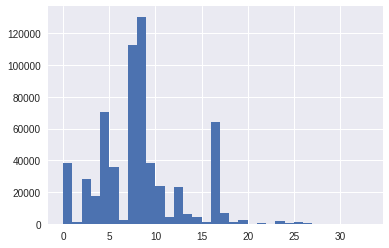

In [24]:
plt.hist(y_test, bins=[i for i in range(0, 34)])
y_test

Beat 0.011919628149287067
District 0.005322396453057512
Ward 0.008706806765680815
Community Area 0.008327844515949638
Year 0.013412550117773097
weekday 0.005642709279738451
hour 0.017651871376030647
month 0.006631123541764274
Description_ord 0.6821858603889283
Location Description_ord 0.08523824698120311
Arrest_ord 0.07010852790831817
Domestic_ord 0.04857003492330496
x 0.01813908137920196
y 0.018143318219762172


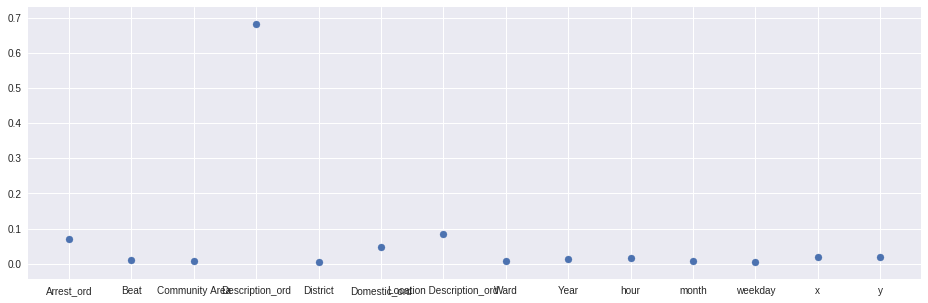

In [119]:
arr = clf.feature_importances_
cols = transformed.loc[:, transformed.columns != 'Primary Type_ord'].columns
for i in range(len(arr)):
    print(cols[i], arr[i])

fig, ax = plt.subplots(figsize=(16,5))
plt.scatter(cols, arr)

# Oversampling

In [26]:
threshold = 1000
counts = pd.Series(y).value_counts(sort=False).tolist()
class_to_sample = []
for i in range(len(counts)):
    if counts[i] < threshold:
        class_to_sample.append(i)
d = pd.Series(y).value_counts(sort=False).to_dict()
for i in class_to_sample:
    d[i] = threshold
class_to_sample

[20, 22, 27, 28, 29, 30, 31, 32, 33]

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

sampler = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], n_jobs=-1,
                 sampling_strategy=d)

X_res, y_res = sampler.fit_resample(X, y)
print('Resampled dataset samples per class {}'.format(Counter(y_res)))

# XAI

Definition: Interpretable ML algorithms by human, contrasts with black box models. Regulations demand reasoning behind algorithm decisions, especially in the context of AML 

# SHAP

In [20]:
import shap
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(clf)


In [100]:
X_shap = transformed.loc[:, transformed.columns != 'Primary Type_ord'][:300]
shap_values = explainer.shap_values(X_shap) #slow


In [118]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_shap)


In [117]:
shap.force_plot(explainer.expected_value[25], shap_values[25], X_shap)


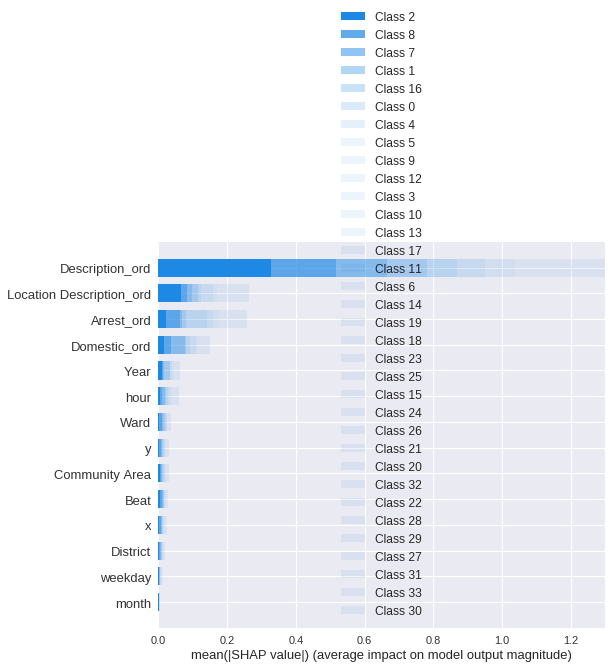

In [116]:
shap.summary_plot(shap_values, X_shap)

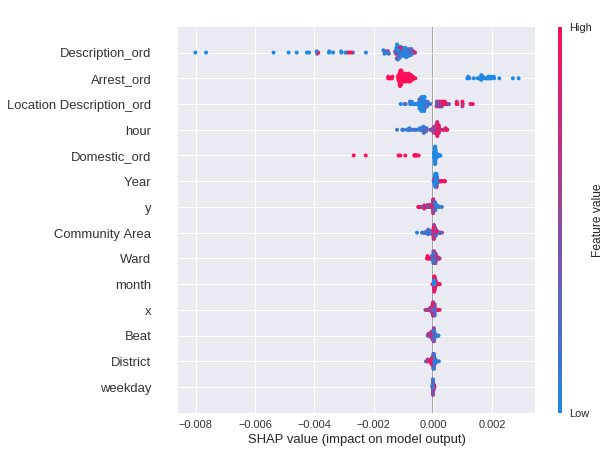

In [94]:
shap.summary_plot(shap_values[25], X_shap)

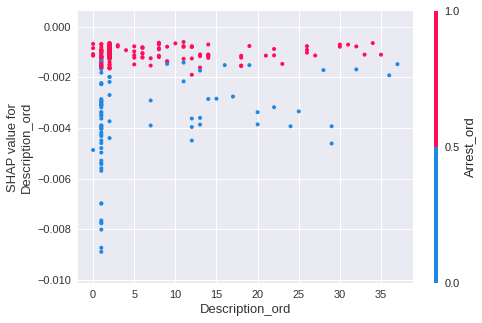

In [115]:
shap.dependence_plot("Description_ord", shap_values[25], X_shap)

Comments:

- Higher order interactions among features are present, indicating a linear model wouldn't perform well
- Most important features are more or less in line with feature importance from RF classifier
- Most important features: Description (makes sense), Location, Arrest, Domestic

Advantages of SHAP:
- Contrastive explanation compared to LIME (explanation in terms of deviation from baseline)
- Theoretical backing from game theory


Disadvantages of SHAP:
- SLOW, even with sampling techniques introduced in the paper
- Explanation can be less sparse than LIME


# LIME

In [112]:
import lime
import lime.lime_tabular

X_lime = transformed.loc[:, transformed.columns != 'Primary Type_ord'][:1000]
y_lime = clf.predict(X_lime.values)
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_lime.values.astype(np.float),
                                                   feature_names = X_lime.columns,
                                                  class_names=[str(i) for i in list(
                                                       transformed['Primary Type_ord'].unique())])


In [113]:
lime_exp = lime_explainer.explain_instance(X_lime.values[250].astype(np.float),
                                           lambda x : clf.predict_proba(x).astype(float))
lime_exp.show_in_notebook(show_table=True)

Comments:

Results are more or less in line with SHAP

Advantages:
- Faster than SHAP
- Sparse explanation
- Measurable fidelity to the original model
- Model Agnostic

Disadvantages:
- No interactions considered
- Hard to estimate what dataset is "local" enough
- Unstable explanations especially for data points near decision boundaries

# Next Steps

- Investigate how each feature affects each class prediction. This will give us more insights in what further features may be useful
- More data augmentation effort - oversampling doesn't appear to help a lot
- Try out implementations for Anchor
- Use NLP on Description and Location to capture similarities among them. This will help improve predictions a lot